# =======================================================================================================
# Exercises (Set 1 - 4) START
# =======================================================================================================

##### Use the iris database to answer the following quesitons:

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
iris = sns.load_dataset('iris')

### 1. What does the distribution of petal lengths look like?

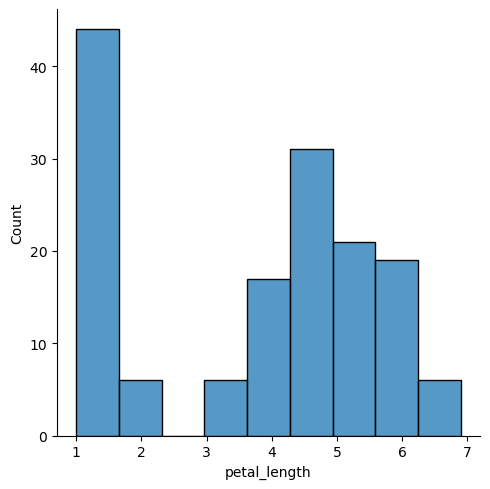

In [3]:
sns.displot(data=iris, x='petal_length');

### 2. Is there a correlation between petal length and petal width? Use http://guessthecorrelation.com/ as a hint to how we could visually determine if a correlation exists between two numeric columns.

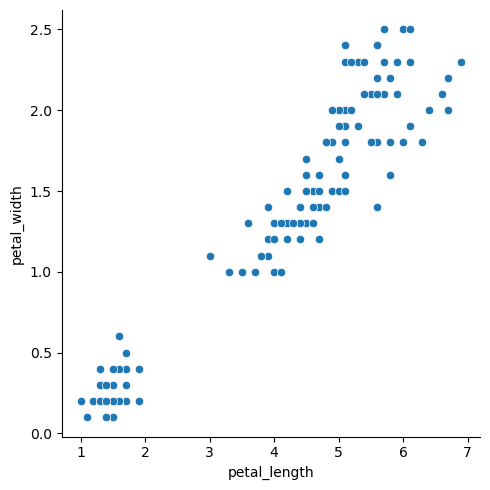

In [4]:
sns.relplot(
data=iris,
x='petal_length',
y='petal_width')
plt.show()

### 3. Would it be reasonable to predict species based on sepal width and sepal length? For this, you'll visualize two numeric columns through the lense of a categorical column.

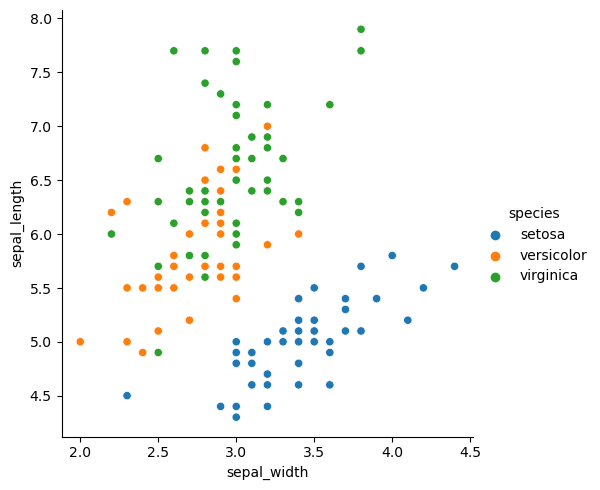

In [6]:
sns.relplot(
data=iris,
x='sepal_width',
y='sepal_length',
hue='species')
plt.show()

### 4. Which features would be best used to predict species?

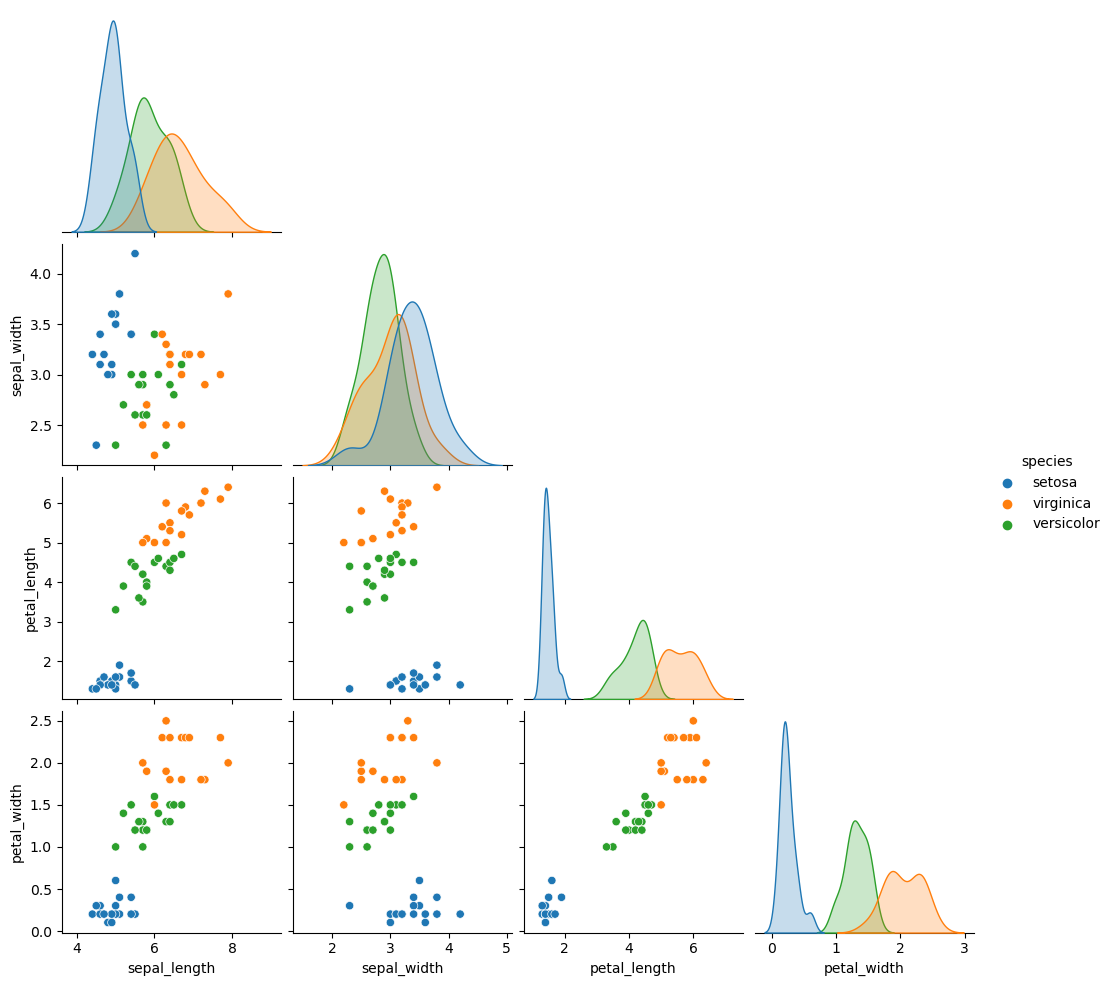

In [14]:
sns.pairplot(
iris.sample(50),
hue='species',
corner=True)
plt.show()

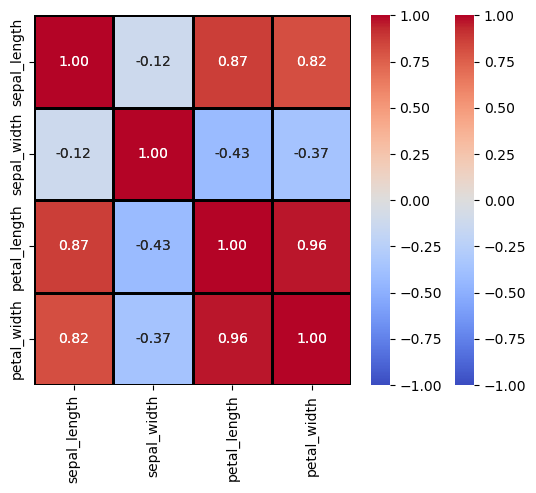

In [10]:
sns.heatmap(
iris.corr(),
annot=True,
cmap='coolwarm',
vmax=1,
vmin=-1,
center=0,
linewidth=1,
linecolor='k',
fmt='.2f')
plt.show()

# =======================================================================================================
# Exercises (Set 1 - 4) END
# Exercises (Set 1 - 4) TO Exercises (Set 2 - 5)
# Exercises (Set 2 - 5) START
# =======================================================================================================

### 1. Using the lesson as an example, use seaborn's load_dataset function to load the anscombe data set. Use pandas to group the data by the dataset column, and calculate summary statistics for each dataset. What do you notice?
### Plot the x and y values from the anscombe data. Each dataset should be in a separate column.

### 2. Load the InsectSprays dataset and read it's documentation. Create a boxplot that shows the effectiveness of the different insect sprays.

### 3. Load the swiss dataset and read it's documentation. The swiss dataset is available from pydatset rather than seaborn. Create visualizations to answer the following questions:

##### 3a. Create an attribute named is_catholic that holds a boolean value of whether or not the province is Catholic. (Choose a cutoff point for what constitutes catholic)

##### 3b. Does whether or not a province is Catholic influence fertility?

##### 3c. What measure correlates most strongly with fertility?

### 4. Using the chipotle dataset from the previous exercise, create a bar chart that shows the 4 most popular items and the revenue produced by each.

### 5. Load the sleepstudy data and read it's documentation. Use seaborn to create a line chart of all the individual subject's reaction times and a more prominant line showing the average change in reaction time.

# =======================================================================================================
# Exercises (Set 2 - 5) END
# =======================================================================================================